# Proyek Prediksi Kanker Payudara
Notebook ini membangun model klasifikasi untuk memprediksi apakah seorang pasien menderita kanker payudara ganas (Malignant) atau jinak (Benign) menggunakan dataset Breast Cancer Wisconsin.

## ==========================
## 🧾 Import Library
## ==========================

Ini adalah bagian untuk mengimpor semua pustaka Python yang dibutuhkan untuk proyek ini. Pustaka-pustaka ini mencakup alat untuk manipulasi data (pandas, numpy), visualisasi (seaborn, matplotlib), machine learning (sklearn), penanganan ketidakseimbangan kelas (imblearn), dan penyimpanan model (joblib).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from google.colab import files

## ==========================
## 📥 Upload dan Load Dataset dari Kaggle
## ==========================

Pada tahap ini, kita mengunggah dataset dari Kaggle ke Google Colab dan membacanya menggunakan `pandas`. Dataset yang digunakan adalah *Breast Cancer Wisconsin (Diagnostic)*, yang merupakan dataset standar dalam masalah klasifikasi kanker payudara.

In [ ]:
# Upload dataset
uploaded = files.upload()

Saving data.csv to data.csv


Setelah file diunggah, kita perlu membaca file CSV tersebut ke dalam DataFrame pandas untuk analisis lebih lanjut. Nama file diambil dari daftar kunci yang diunggah.

In [ ]:
# Membaca file CSV ke dalam DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

## ==========================
## 🔍 Eksplorasi Data
## ==========================
Langkah  eksplorasi data (Exploratory Data Analysis/EDA) ini bertujuan memahami struktur data, tipe kolom, serta distribusi label target (`diagnosis`).Ini membantu dalam mengidentifikasi potensi masalah data seperti nilai kosong, tipe data yang tidak sesuai, atau ketidakseimbangan kelas.

### Menampilkan 5 Baris Pertama Dataset

Kode ini menampilkan 5 baris pertama dari DataFrame untuk mendapatkan gambaran awal tentang data dan kolom-kolomnya.

In [ ]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wo

**Hasil:**  
Terlihat bahwa dataset memiliki kolom `id`, `diagnosis`, dan 30 fitur numerik yang berkaitan dengan karakteristik sel kanker payudara. Selain itu, terdapat juga kolom `Unnamed: 32` yang tidak memiliki nama jelas dan akan diperiksa lebih lanjut untuk menentukan apakah kolom tersebut memiliki informasi yang berguna atau dapat dihapus dari dataset.


### Menampilkan Informasi Umum Dataset

Kode ini memberikan ringkasan DataFrame, termasuk jumlah entri non-null untuk setiap kolom dan tipe datanya. Ini penting untuk mendeteksi missing values dan memahami jenis data yang ada.

In [ ]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se  

**Hasil:**  
Terungkap bahwa dataset terdiri dari 569 entri. Kolom `Unnamed: 32` memiliki 0 nilai non-null, yang menunjukkan bahwa kolom ini sepenuhnya kosong (NaN) dan tidak menyumbang informasi apapun. Kolom `id` bertipe integer dan `diagnosis` bertipe object (string), sementara ke-30 fitur lainnya bertipe float. Penemuan kolom kosong ini menunjukkan perlunya dilakukan tahap pembersihan data sebelum analisis lebih lanjut.


#### Menampilkan Distribusi Label Target (diagnosis)

**Proses:**  
Kode ini menghitung dan menampilkan jumlah kemunculan setiap nilai unik dalam kolom `diagnosis`. Nilai-nilai ini merepresentasikan dua kelas target dalam dataset: 'M' untuk *Malignant* (ganas) dan 'B' untuk *Benign* (jinak).

**Tujuan:**  
Untuk memahami distribusi kelas target. Informasi ini penting untuk mengidentifikasi apakah terdapat ketidakseimbangan kelas (class imbalance), yang dapat mempengaruhi performa dan strategi pelatihan model. Dalam konteks ini, distribusi label yang tidak seimbang dapat menyebabkan model bias terhadap kelas mayoritas.

In [ ]:
print("\nDiagnosis Distribution:")
print(df['diagnosis'].value_counts())


Diagnosis Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


**Hasil:**  
Distribusi diagnosis menunjukkan bahwa terdapat 357 kasus *Benign* ('B') dan 212 kasus *Malignant* ('M'). Hal ini mengonfirmasi adanya ketidakseimbangan kelas, di mana kelas *Benign* (mayoritas) memiliki lebih banyak sampel dibandingkan kelas *Malignant* (minoritas).  
Ketidakseimbangan ini penting untuk diperhatikan karena dapat menyebabkan model bias terhadap kelas mayoritas. Oleh karena itu, perlu diterapkan strategi penanganan seperti oversampling (misalnya SMOTE) untuk memastikan model dapat belajar secara adil dari kedua kelas.

### Visualisasi Distribusi Target

Kode ini membuat grafik batang (countplot) untuk memvisualisasikan distribusi label target. Visualisasi ini memudahkan pemahaman tentang proporsi masing-masing kelas.

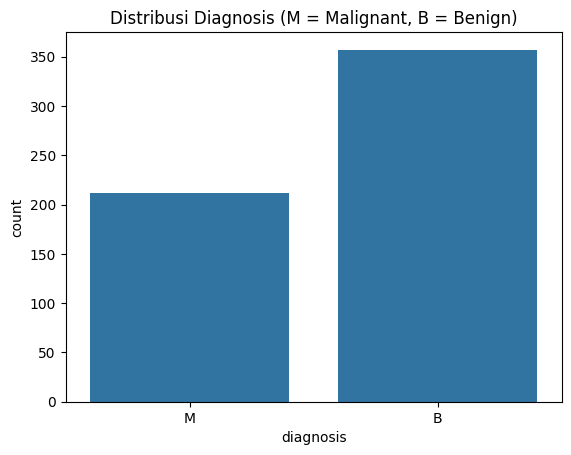

In [ ]:
# 📊 Visualisasi Distribusi Target
sns.countplot(x='diagnosis', data=df)
plt.title('Distribusi Diagnosis (M = Malignant, B = Benign)')
plt.show()

**Hasil:** Grafik batang secara visual mengonfirmasi bahwa jumlah pasien dengan diagnosis 'Benign' jauh lebih banyak dibandingkan 'Malignant'. Ini memperkuat urgensi penggunaan teknik penanganan *imbalanced data*.

## ==========================
## 🧹 Preprocessing Data
## ==========================
Tahap persiapan data adalah langkah krusial untuk memastikan kualitas dan kesesuaian data untuk proses pemodelan machine learning. Beberapa teknik *data preparation* yang dilakukan dalam proyek ini adalah sebagai berikut, disajikan secara berurutan:

#### 1. Penghapusan Kolom Tidak Perlu dan Penanganan Nilai Kosong (NaN)

- **Proses**: Kolom `'Unnamed: 32'` dan `'id'` dihapus dari dataset.
- **Alasan**:
  - Kolom `'Unnamed: 32'` diketahui mengandung nilai `NaN` (null) di seluruh barisnya berdasarkan eksplorasi data (`df.info()`). Kolom ini tidak memberikan informasi yang berguna untuk prediksi dan dapat mengganggu proses pemodelan.
  - Kolom `'id'` adalah pengidentifikasi unik pasien dan tidak relevan sebagai fitur prediktif karena tidak memiliki hubungan prediktif dengan diagnosis.

Penghapusan kedua kolom ini bertujuan untuk menyederhanakan data dan menghilangkan *noise* yang dapat memengaruhi kinerja model.

In [ ]:
# Bersihkan Kolom Tak Perlu dan Tangani NaN
df = df.drop(columns=['Unnamed: 32', 'id'], errors='ignore')

#### 2. Pembuatan Fitur dan Label

- **Proses**: Dataset dibagi menjadi fitur (`X`) dan label target (`y`). Kolom `'diagnosis'` ditetapkan sebagai label (`y`), sementara semua kolom lainnya menjadi fitur (`X`).
- **Alasan**: Pemisahan ini adalah langkah standar dalam machine learning untuk mendefinisikan variabel independen (*fitur*) yang akan digunakan untuk memprediksi variabel dependen (*label*). Model akan dilatih pada `X` untuk memprediksi `y`.

In [ ]:
# Pisahkan fitur dan target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#### 3. Encoding Label Target

- **Proses**: Label `diagnosis` yang awalnya berupa string (`'M'` untuk *Malignant* dan `'B'` untuk *Benign*) diubah menjadi format numerik. Nilai `'M'` dipetakan menjadi `0` (*Malignant*) dan `'B'` dipetakan menjadi `1` (*Benign*).
- **Alasan**: Sebagian besar algoritma machine learning memerlukan input numerik untuk melakukan perhitungan. Oleh karena itu, label kategori perlu dikonversi menjadi representasi numerik.  
  Pemetaan ini juga konsisten dengan konvensi umum di mana `0` sering digunakan untuk kelas minoritas atau kelas negatif (dalam kasus ini, *ganas*) dalam konteks masalah klasifikasi biner.

In [ ]:
# Label encoding jika diagnosis berupa huruf
if y.dtype == 'O':
    y = y.map({'M': 0, 'B': 1})

#### 4. Normalisasi Fitur

- **Proses**: Fitur-fitur dalam `X` dinormalisasi menggunakan `StandardScaler`. `StandardScaler` mengubah distribusi setiap fitur sehingga memiliki rata-rata nol (`0`) dan standar deviasi satu (`1`).
- **Alasan**: Normalisasi sangat penting ketika fitur-fitur memiliki skala yang berbeda (misalnya, `radius_mean` memiliki nilai puluhan, sementara `fractal_dimension_mean` memiliki nilai desimal kecil).  
  Algoritma seperti *Logistic Regression* (dan banyak algoritma berbasis gradien lainnya) sensitif terhadap skala fitur. Tanpa normalisasi, fitur dengan rentang nilai yang lebih besar dapat mendominasi perhitungan jarak atau bobot, sehingga model mungkin tidak belajar dengan optimal dan proses pelatihan bisa lebih lambat.

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 5. Pembagian Data Latih dan Uji

- **Proses**: Data yang telah diproses (`X_scaled` dan `y`) dibagi menjadi data latih (80%) dan data uji (20%) menggunakan `train_test_split` dengan `random_state=42` untuk reproduktifitas.
- **Alasan**: Pembagian data ini memungkinkan kita untuk melatih model pada sebagian data (*data latih*) dan mengevaluasinya pada data yang belum pernah dilihat model sebelumnya (*data uji*).  
  Ini adalah cara standar untuk mengestimasi kinerja model pada data baru dan mencegah *overfitting*, di mana model terlalu spesifik terhadap data latih dan tidak mampu melakukan generalisasi dengan baik pada data yang tidak dikenal.  
  Penggunaan `random_state=42` memastikan bahwa pembagian data akan selalu sama setiap kali kode dijalankan, sehingga hasil dapat direproduksi secara konsisten.

In [ ]:
# Split Data (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## ==========================
## 🔄 SMOTE untuk Menangani Kelas Tidak Seimbang
## ==========================
- **Proses**: Karena distribusi kelas target tidak seimbang (357 *Benign* vs 212 *Malignant*), teknik **Synthetic Minority Over-sampling Technique (SMOTE)** diterapkan pada data latih (`X_train`, `y_train`) untuk menyeimbangkan jumlah sampel di kedua kelas.  
  SMOTE menghasilkan sampel sintetis dari kelas minoritas (*Malignant*) berdasarkan tetangga terdekatnya.
- **Alasan**: Ketidakseimbangan kelas dapat menyebabkan model bias terhadap kelas mayoritas, menghasilkan akurasi yang tinggi namun kinerja yang buruk pada kelas minoritas.  
  Dalam konteks diagnosis kanker, kelas minoritas (*Malignant*) adalah yang paling penting untuk dideteksi.  
  Dengan menyeimbangkan data latih menggunakan SMOTE, model memiliki kesempatan yang lebih baik untuk belajar karakteristik kelas minoritas, sehingga menghasilkan kinerja yang lebih *robust* dan tidak bias, terutama dalam hal *recall* pada kelas *Malignant* yang krusial.

In [ ]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

## ==========================
## 🧠 Pelatihan Model: Logistic Regression
## ==========================
- **Proses**: Pada bagian ini, kita melatih model klasifikasi **Logistic Regression** dengan menggunakan data latih yang telah diseimbangkan menggunakan SMOTE.
- **Alasan**: Logistic Regression merupakan metode dasar namun efektif dalam menyelesaikan masalah klasifikasi biner.  
  Model ini sering dijadikan **baseline model** karena memiliki sejumlah keunggulan, antara lain:
  - Interpretasi hasil yang sederhana dan mudah dipahami,
  - Efisiensi komputasi yang tinggi,
  - Kemampuan memberikan probabilitas prediksi, bukan hanya label kelas.  
  Dengan menggunakan data yang telah diseimbangkan, model diharapkan mampu belajar dengan lebih adil dari kedua kelas (Malignant dan Benign).

#### Tahapan dan Parameter yang Digunakan

- **Algoritma**: Model yang digunakan adalah **Logistic Regression** dari modul `sklearn.linear_model`.
- **Parameter**:
  - `max_iter=1000`: Parameter ini mengatur jumlah iterasi maksimum yang diizinkan untuk proses optimisasi model.  
    Nilai 1000 dipilih untuk memastikan proses pelatihan memiliki cukup iterasi agar dapat **mencapai konvergensi**, terutama setelah penggunaan teknik SMOTE yang menambahkan jumlah sampel dan dapat memperpanjang waktu yang dibutuhkan model untuk mencapai solusi optimal.
- **Tahapan Pelatihan**: Model dilatih menggunakan data latih yang telah diseimbangkan oleh SMOTE, yaitu `X_train_sm` dan `y_train_sm`.  
  Pelatihan ini bertujuan agar model belajar dengan representasi data yang seimbang, sehingga mampu mengenali pola pada kedua kelas dengan baik.


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

**Kelebihan dan Kekurangan Algoritma Logistic Regression**

**Kelebihan:**
- **Sederhana dan Mudah Diinterpretasikan**: Logistic Regression memiliki dasar matematis yang jelas. Koefisien model dapat diinterpretasikan sebagai bobot fitur, yang menunjukkan arah dan kekuatan pengaruh terhadap probabilitas kelas. Ini menjadikannya alat yang baik untuk analisis interpretatif, termasuk dalam konteks medis.
- **Efisiensi Komputasi**: Proses pelatihan Logistic Regression sangat cepat, cocok untuk dataset berukuran kecil hingga sedang. Hal ini menjadikannya pilihan ideal sebagai **baseline model**.
- **Performa Baik pada Data Linear**: Jika data dapat dipisahkan secara linear, Logistic Regression biasanya mampu memberikan performa yang solid dan dapat diandalkan.
- **Memberikan Probabilitas**: Logistic Regression tidak hanya menghasilkan label kelas, tetapi juga probabilitas. Ini berguna untuk pengambilan keputusan berbasis ambang batas tertentu — misalnya, dalam konteks klinis ketika keputusan perlu mempertimbangkan risiko.

**Kekurangan:**
- **Asumsi Linearitas**: Model ini mengasumsikan hubungan linear antara fitur input dan log-odds dari output. Jika hubungan antara fitur dan target bersifat non-linear, performa model bisa menurun.
- **Sensitif terhadap Outlier**: Outlier dapat sangat memengaruhi hasil karena model mencoba meminimalkan fungsi biaya yang sensitif terhadap nilai ekstrem.
- **Kurang Efektif untuk Hubungan Kompleks**: Logistic Regression tidak mampu menangkap hubungan non-linear yang kompleks antara fitur dan label, tidak seperti metode seperti Support Vector Machines dengan kernel non-linear atau Neural Networks.

---

**Proses Improvement (Jika Hanya Menggunakan 1 Algoritma)**

Dalam proyek ini, hanya satu algoritma yang digunakan, yaitu **Logistic Regression**, sebagai baseline model. Namun demikian, upaya perbaikan model tetap dilakukan melalui:

- **Penanganan Imbalanced Data dengan SMOTE**:
  - SMOTE (Synthetic Minority Over-sampling Technique) diterapkan untuk menyeimbangkan distribusi kelas dalam data latih.
  - Ketidakseimbangan kelas dapat menyebabkan model bias terhadap kelas mayoritas ('Benign'), sehingga mengabaikan kelas minoritas ('Malignant') yang justru paling krusial untuk dideteksi dalam konteks medis.
  - Dengan penggunaan SMOTE, model diberikan peluang yang lebih baik untuk mempelajari karakteristik dari kedua kelas secara seimbang, khususnya untuk meningkatkan **recall** pada kelas 'Malignant', yang berperan penting dalam diagnosis kanker.


## ==========================
## 📈 Evaluasi Model
## ==========================
Model diuji terhadap data uji untuk menghitung metrik performa. Evaluasi ini penting untuk memahami seberapa baik model dapat menggeneralisasi pada data yang tidak terlihat sebelumnya.

#### Membuat Prediksi pada Data Uji

Setelah model Logistic Regression selesai dilatih menggunakan data latih yang telah diseimbangkan, langkah selanjutnya adalah **menguji kemampuan generalisasi model** terhadap data yang belum pernah dilihat sebelumnya, yaitu data uji (X_test).

**Proses:**
- Model yang telah dilatih (`model`) digunakan untuk memprediksi label diagnosis pada data uji (`X_test`).
- Hasil prediksi disimpan dalam variabel `y_pred`.

**Tujuan:**
Langkah ini bertujuan untuk mengetahui seberapa baik model mampu mengklasifikasikan data baru dan mengevaluasi performa sebenarnya di luar data pelatihan. Ini sangat penting untuk mengukur efektivitas model dalam konteks dunia nyata, seperti prediksi diagnosis pada pasien baru.

In [ ]:
# 📈 Evaluasi Model
y_pred = model.predict(X_test)

#### Menampilkan Confusion Matrix dan Classification Report

**Proses**:  
Model yang telah dilatih diuji menggunakan data uji (`X_test` dan `y_test`). Kinerja model dievaluasi dengan menampilkan:

- **Confusion Matrix** dalam bentuk heatmap.
- **Classification Report**, yang mencakup metrik seperti precision, recall, f1-score, dan accuracy untuk masing-masing kelas ('Malignant' dan 'Benign').

**Alasan**:  
Evaluasi model dengan hanya mengandalkan nilai akurasi bisa menyesatkan, terutama pada dataset yang tidak seimbang. Oleh karena itu:

- **Confusion Matrix** memungkinkan kita melihat secara detail jumlah prediksi benar dan salah untuk setiap kelas.
- **Classification Report** memberikan metrik yang lebih menyeluruh:
  - **Precision**: Seberapa akurat model dalam memprediksi positif (berapa banyak dari yang diprediksi positif benar-benar positif).
  - **Recall**: Seberapa baik model menangkap seluruh kasus positif yang sebenarnya (penting dalam konteks diagnosis penyakit serius).
  - **F1-score**: Rata-rata harmonis antara precision dan recall.
  - **Accuracy**: Persentase prediksi yang benar dari seluruh prediksi.



**Metrik Evaluasi yang Digunakan**

Untuk mengukur kinerja model Logistic Regression dalam memprediksi kanker payudara, beberapa metrik evaluasi klasifikasi yang relevan digunakan:

---

**1. Confusion Matrix**

**Penjelasan**:  
Confusion Matrix adalah tabel yang menggambarkan performa model klasifikasi pada data uji dengan label yang diketahui. Matriks ini menunjukkan:

- **TP (True Positive)**: Kasus *Benign* yang diprediksi dengan benar sebagai *Benign*.
- **TN (True Negative)**: Kasus *Malignant* yang diprediksi dengan benar sebagai *Malignant*.
- **FP (False Positive)**: Kasus *Malignant* yang salah diprediksi sebagai *Benign*. Ini disebut **Type I Error**.
- **FN (False Negative)**: Kasus *Benign* yang salah diprediksi sebagai *Malignant*. Ini disebut **Type II Error**.

**Tujuan**:  
Confusion Matrix memberikan gambaran rinci tentang jenis kesalahan yang dilakukan model. Dalam konteks medis, **False Negative** (kasus kanker yang tidak terdeteksi) adalah yang paling berbahaya karena dapat menyebabkan keterlambatan diagnosis dan penanganan.

---

**2. Accuracy**

**Formula**:  
$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

**Penjelasan**:  
Mengukur proporsi total prediksi yang benar dari semua prediksi.

**Tujuan**:  
Memberikan gambaran umum tentang performa model. Namun, pada dataset yang tidak seimbang, nilai akurasi saja bisa menyesatkan karena model dapat mengabaikan kelas minoritas namun tetap terlihat "baik" secara akurasi.

---

**3. Precision**

**Formula**:  
$Precision = \frac{TP}{TP + FP}$

**Penjelasan**:  
Precision mengukur seberapa banyak dari prediksi positif yang benar-benar benar. Untuk kelas *Malignant* (jika didefinisikan sebagai kelas positif), precision mengindikasikan dari semua prediksi 'Malignant', berapa banyak yang memang benar-benar kanker.

**Tujuan**:  
Tinggi precision berarti sedikit pasien sehat yang salah didiagnosis sebagai sakit (False Positive). Ini penting untuk menghindari kecemasan atau prosedur medis yang tidak perlu.

---

**4. Recall (Sensitivity)**

**Formula**:  
$Recall = \frac{TP}{TP + FN}$

**Penjelasan**:  
Recall mengukur seberapa banyak dari kasus positif yang berhasil dideteksi model. Dalam konteks ini, recall untuk kelas *Malignant* menunjukkan seberapa baik model mendeteksi semua kasus kanker yang sebenarnya.

**Tujuan**:  
Recall sangat penting dalam diagnosis medis. **False Negative** bisa sangat berbahaya, sehingga recall tinggi menunjukkan bahwa model jarang melewatkan kasus kanker.

---

**5. F1-Score**

**Formula**:  
$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

**Penjelasan**:  
F1-Score adalah rata-rata harmonis dari precision dan recall, memberikan satu skor gabungan untuk mengevaluasi model.

**Tujuan**:  
F1-Score berguna terutama pada dataset yang tidak seimbang, karena mempertimbangkan keseimbangan antara false positives dan false negatives.

---

Dengan menggunakan metrik-metrik ini secara bersamaan, kita mendapatkan pemahaman yang lebih komprehensif terhadap performa model dalam mendeteksi kanker payudara secara tepat dan andal.

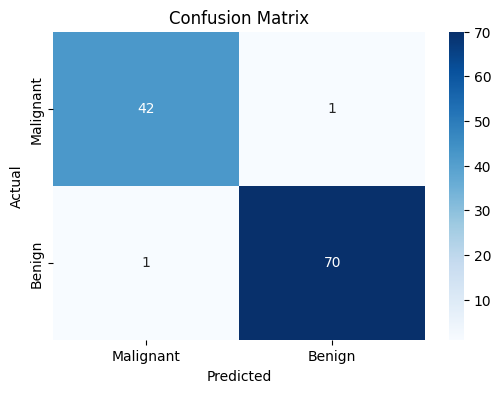


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Dari hasil evaluasi yang diperoleh, model **Logistic Regression** menunjukkan performa yang sangat baik dalam mendeteksi kanker payudara:

---

**Hasil Metrik Evaluasi:**

- **Accuracy**: 0.98  
  Artinya, 98% dari total prediksi model adalah benar.

- **Precision (Malignant, label 0)**: 0.98  
  Dari semua prediksi "Malignant" oleh model, 98% di antaranya benar-benar merupakan kasus "Malignant".

- **Recall (Malignant, label 0)**: 0.98  
  Dari semua kasus "Malignant" yang sebenarnya, model berhasil mendeteksi 98% di antaranya.

- **F1-Score (Malignant, label 0)**: 0.98  
  Menunjukkan keseimbangan yang sangat baik antara precision dan recall pada kelas kanker ganas.

- **Precision (Benign, label 1)**: 0.99  
- **Recall (Benign, label 1)**: 0.99  
- **F1-Score (Benign, label 1)**: 0.99

---

**Confusion Matrix:**

- **True Negatives (TN)**: Kasus *Malignant* yang berhasil diprediksi dengan benar sebagai *Malignant* (contoh: 42 dari 43 kasus).
- **True Positives (TP)**: Kasus *Benign* yang berhasil diprediksi dengan benar sebagai *Benign* (contoh: 70 dari 71 kasus).
- **False Positives (FP)**: Kasus *Benign* yang salah diprediksi sebagai *Malignant* (1 kasus).
- **False Negatives (FN)**: Kasus *Malignant* yang salah diprediksi sebagai *Benign* (1 kasus).

---

**Analisis:**

Dengan hanya **1 False Negative** dan **1 False Positive**, model menunjukkan **akurasi tinggi dan kesalahan yang sangat minim**. Ini sangat penting mengingat konteks medis dari permasalahan ini.

Dalam diagnosis kanker payudara, meminimalkan **False Negatives** (pasien yang memiliki kanker ganas tetapi tidak terdeteksi) adalah prioritas utama karena dapat menunda penanganan yang diperlukan. Model ini berhasil mencapai **recall tinggi (0.98)** untuk kelas *Malignant*, yang berarti hampir semua kasus kanker ganas berhasil terdeteksi.

Di sisi lain, precision yang juga tinggi (0.98) menunjukkan bahwa sebagian besar prediksi *Malignant* oleh model memang benar, sehingga mengurangi kemungkinan **False Positives** yang dapat menyebabkan kekhawatiran dan prosedur medis yang tidak diperlukan.

Dengan nilai **F1-Score sebesar 0.98** untuk kelas *Malignant*, model menunjukkan keseimbangan optimal antara kemampuan mendeteksi kanker (recall) dan keakuratan prediksi tersebut (precision).

---

**Kesimpulan:**

Model Logistic Regression yang dikembangkan mampu memberikan kinerja yang sangat baik dan seimbang dalam konteks klasifikasi kanker payudara. Dengan kemampuan mendeteksi hampir semua kasus kanker ganas dan tingkat kesalahan yang sangat rendah, model ini dapat menjadi alat bantu pengambilan keputusan yang andal dalam praktik klinis.

## ==========================
## 💾 Simpan Model dan Scale
## ==========================

**Penyimpanan Model dan Scaler**

**Proses:**  
Model *Logistic Regression* yang telah dilatih dan objek *StandardScaler* yang digunakan untuk normalisasi fitur disimpan ke dalam file `.pkl` menggunakan pustaka `joblib`.

---

**Tujuan:**  
Penyimpanan model dan scaler ini memiliki beberapa manfaat penting:

- **Efisiensi Waktu:**  
  Kita tidak perlu melatih ulang model dari awal setiap kali ingin menggunakannya. Ini sangat berguna saat model digunakan berulang kali, baik untuk inferensi pada data baru maupun dalam proses deployment.

- **Konsistensi Preprocessing:**  
  Data baru yang akan diprediksi harus dinormalisasi menggunakan **rata-rata dan standar deviasi** yang sama seperti yang digunakan saat pelatihan. Oleh karena itu, objek `StandardScaler` juga disimpan agar dapat digunakan kembali untuk mentransformasi data baru secara konsisten.

- **Deployment Model:**  
  File `.pkl` dapat di-*load* di aplikasi berbasis web, API, atau lingkungan produksi lainnya untuk melakukan prediksi real-time tanpa memuat keseluruhan pipeline pelatihan.

---

**Catatan:**  
Dalam implementasinya, proses penyimpanan ini dilakukan dengan menggunakan `joblib.dump()` dan hasilnya berupa dua file, misalnya:

- `model_logreg.pkl` → berisi model Logistic Regression
- `scaler.pkl` → berisi objek StandardScaler


In [ ]:
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nModel dan scaler telah disimpan.")


Model dan scaler telah disimpan.


**Hasil:**  
Dua file berhasil dibuat dan disimpan di direktori kerja sebagai hasil dari proses penyimpanan:

- `logistic_regression_model.pkl` → berisi model Logistic Regression yang telah dilatih.
- `scaler.pkl` → berisi objek StandardScaler yang digunakan untuk normalisasi fitur.

Kedua file ini dapat digunakan kembali untuk melakukan prediksi pada data baru tanpa perlu mengulang proses pelatihan dan normalisasi, sehingga sangat berguna untuk keperluan deployment atau evaluasi lanjutan.


## ==========================
## 🔍 Tes Model dengan Data Baru
## ==========================
Model yang disimpan digunakan kembali untuk memprediksi hasil diagnosis berdasarkan input data pasien baru. Tahap ini mensimulasikan bagaimana model akan digunakan dalam skenario dunia nyata untuk membuat prediksi pada data yang belum pernah dilihat sebelumnya.

#### Menyiapkan Contoh Data Baru

**Proses:**  
Sebuah array NumPy bernama `new_data` dibuat yang berisi 30 fitur numerik. Nilai-nilai tersebut diambil sebagai contoh dari dataset asli (misalnya, baris pertama yang diketahui memiliki diagnosis 'Malignant') untuk mensimulasikan karakteristik sel dari massa payudara yang akan diprediksi.

**Tujuan:**  
Contoh data ini digunakan untuk menguji fungsionalitas model Logistic Regression yang telah disimpan sebelumnya, sekaligus memastikan bahwa pipeline prediksi bekerja dengan baik pada input baru yang menyerupai data dunia nyata.


In [ ]:
# Contoh input (30 fitur dari dataset breast cancer)
new_data = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184,
                      0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                      1.095, 0.9053, 8.589, 153.4, 0.006399,
                      0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                      25.38, 17.33, 184.6, 2019.0, 0.1622,
                      0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])

#### Memuat Model dan Scaler yang Tersimpan

**Proses:**  
Model (`logistic_regression_model.pkl`) dan objek scaler (`scaler.pkl`) yang telah disimpan sebelumnya dimuat kembali ke dalam memori menggunakan `joblib.load()`.

**Alasan:**  
Ini adalah praktik standar dalam machine learning untuk memanfaatkan model terlatih tanpa harus mengulang seluruh proses pelatihan yang memakan waktu. Dengan memuat model dan scaler, kita dapat langsung melakukan prediksi terhadap data baru dengan efisien dan konsisten.

In [ ]:
# Load model dan scaler
loaded_model = joblib.load('logistic_regression_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

#### Preprocessing Data Baru dan Membuat Prediksi

**Proses:**  
Data baru (`new_data`) pertama-tama diskalakan menggunakan `loaded_scaler` agar fitur-fiturnya berada dalam skala yang sama seperti data pelatihan. Setelah itu, `loaded_model` digunakan untuk melakukan prediksi kelas (`prediction`) dan menghitung probabilitas keanggotaan kelas (`probability`) dari data yang telah diskalakan.

**Alasan:**  
Penting untuk menerapkan preprocessing yang sama—dalam hal ini normalisasi—pada data baru sebagaimana dilakukan pada data pelatihan. Hal ini menjamin bahwa input ke model tetap konsisten dalam hal distribusi nilai, sehingga prediksi yang dihasilkan tetap akurat dan sesuai dengan performa model saat dilatih.


In [ ]:
# Preprocess dan prediksi
new_data_scaled = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)
probability = loaded_model.predict_proba(new_data_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Menampilkan Hasil Prediksi

**Proses:**  
Hasil prediksi (`prediction`) dan probabilitas (`probability`) ditampilkan dalam format yang mudah dimengerti dengan mengkonversi label numerik (0 atau 1) kembali menjadi label kategori ('Malignant' atau 'Benign').

**Insight:**  
Untuk contoh `new_data` yang diberikan, model memprediksi **Malignant** dengan probabilitas yang sangat tinggi untuk kelas 'Malignant' (mendekati 1.0) dan probabilitas yang sangat rendah untuk kelas 'Benign'. Hal ini menunjukkan bahwa model sangat yakin dengan prediksinya, yang merupakan indikator kepercayaan tinggi terhadap diagnosis pada data tersebut.


In [ ]:
label = 'Benign' if prediction[0] == 1 else 'Malignant'
print(f"\nPrediksi Data Baru: {label}")
print(f"Probabilitas (Malignant vs Benign): {probability}")


Prediksi Data Baru: Malignant
Probabilitas (Malignant vs Benign): [[9.99999998e-01 1.51999871e-09]]
